# **Ноутбук (блокнот) создан на основе этой статьи:**
 https://xakep.ru/2019/08/29/nn-digits-recognition/

 Подробнее о том, как работать в Google Colab можно почитать например здесь:
 https://skillbox.ru/media/code/data_science_dostupnyy_kazhdomu/

# Еще раз повторим как работает нейронная сеть.

Как работает один нейрон? Сигналы со входов (1) суммируются (2), причем каждый вход имеет свой «коэффициент передачи» — w. Затем к получившемуся результату применяется «функция активации» (3).
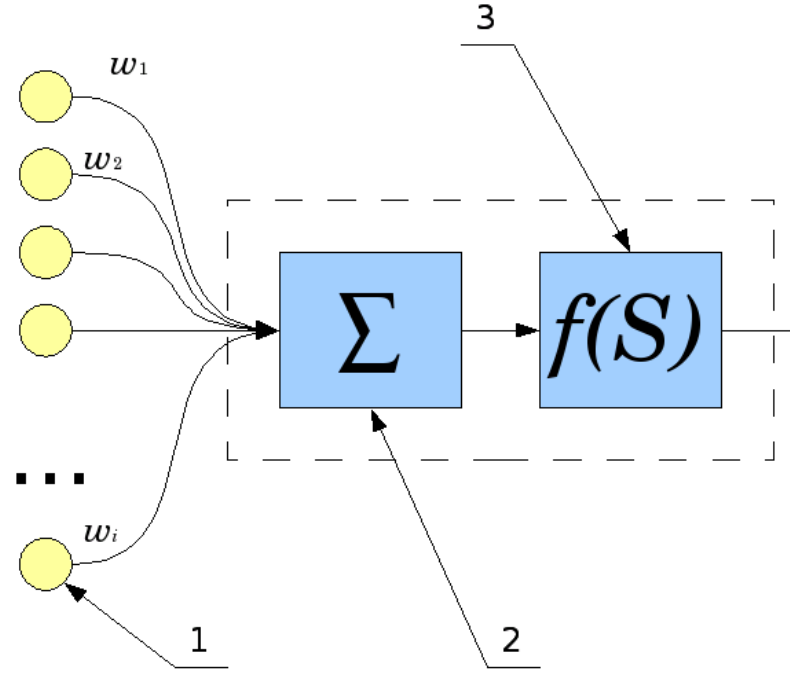

Типы этой функции различны, она может быть:

 **прямоугольной (на выходе 0 или 1)**;

 **линейной;**

 **в виде сигмоиды.**

Еще в 1943 году Мак-Каллок и Питтс доказали, что сеть из нейронов может выполнять различные операции. Но сначала эту сеть нужно обучить — настроить коэффициенты w каждого нейрона так, чтобы сигнал передавался нужным нам способом. Запрограммировать нейронную сеть и обучить ее с нуля сложно, но, к счастью для нас, все необходимые библиотеки уже написаны. Благодаря компактности языка Python все действия можно запрограммировать в несколько строк кода.

# **Рассмотрим простейшую нейросеть и научим ее выполнять функцию XOR**.
# Как работает функция XOR (исключающее ИЛИ):

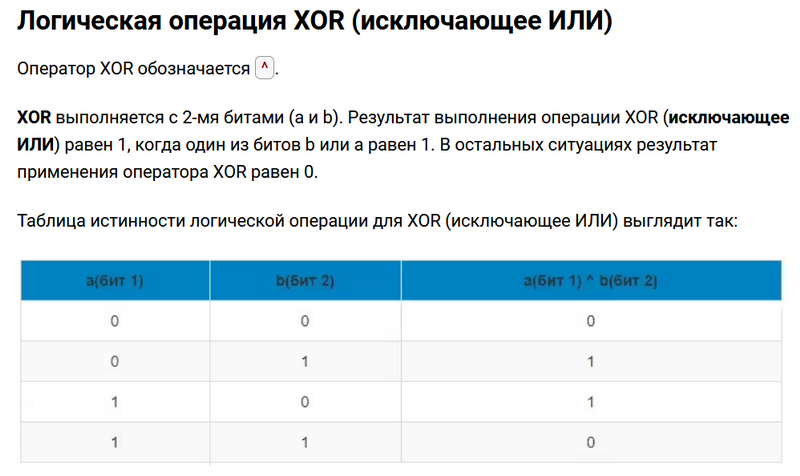


In [ ]:
# Для запуска ноутбука потребуется библиотека Tensorflow (здесь  ней подробнее:
# https://skillbox.ru/media/code/biblioteka-tensorflow-pishem-neyroset-i-izuchaem-printsipy-mashinnogo-obucheniya/)

!pip install tensorflow

In [2]:
# Подключаем другие необходимые модули:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [3]:
# Теперь мы готовы создать нейросеть. Благодаря Tensorflow на это понадобится всего лишь четыре строчки кода.
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu')) # функция активации - 'relu'
model.add(Dense(1, activation='sigmoid')) # функция активации - 'sigmoid'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

Разберём код подробнее. **Sequential** — это тип нейросети, означающий, что процесс обучения будет последовательным. Это стандартный процесс обучения для простых нейросетей: в нём она сначала делает предсказания, затем тестирует их и сравнивает с результатом, а в конце — корректирует ошибки. Dense — это в данном случае тип слоя.
Мы создали модель нейронной сети и добавили в нее слои: входной, скрытый и выходной. Такая сеть называется «многослойный перцептрон» (multilayer perceptron), в общем виде она выглядит так:

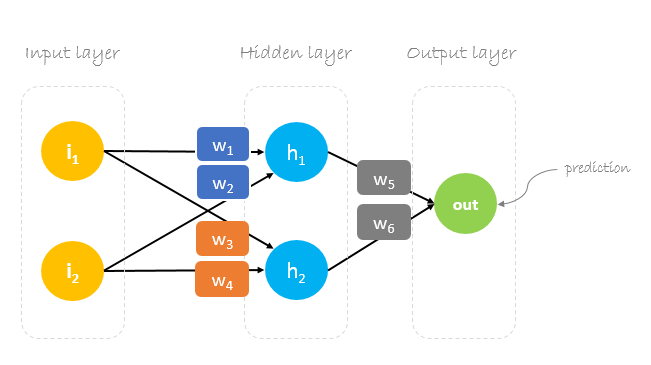

В нашем случае сеть имеет два входа (внешний слой), два нейрона во внутреннем слое и один выход.
**Можно посмотреть, что у нас получилось:**

In [ ]:
print(model.summary())

Обучение нейросети состоит в нахождении значений параметров этой сети.
Наша сеть имеет девять параметров. Чтобы обучить ее, нам понадобится исходный набор данных, в нашем случае это результаты работы функции XOR. Обучение займет какое-то время.

In [5]:
# Наши входные данные a и b - см. таблицу выше (где показаны результаты работы функции XOR).
X = np.array([[0,0], [0,1], [1,0], [1,1]])

# Выходные данные, которые мы долны предсказать (т.е. 0 и 0 на входе дают 0 на выходе и т.п.):
y = np.array([[0], [1], [1], [0]])

# Обучаем нашу нейросеть, используем 2000 эпох обучения:
model.fit(X, y, batch_size=1, epochs=2000, verbose=0)

In [6]:
# Можем посмотреть, какие получились веса и смещения после обучения.
## Parameters layer 1
W1 = model.get_weights()[0]
b1 = model.get_weights()[1]
## Parameters layer 2
W2 = model.get_weights()[2]
b2 = model.get_weights()[3]

print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)
print()

W1: [[ 1.5589707 -2.05749  ]
 [-1.5622256  2.0555444]]
b1: [-0.00235292 -0.00040028]
W2: [[4.418547 ]
 [3.4081564]]
b2: [-2.5067573]



Но алгоритм обучения, который используется в **Keras**, не идеален: нейросети не всегда удается обучиться за 2000 итераций, и результаты не всегда верны. Так, Keras инициализирует начальные значения случайными величинами, и при каждом запуске результат может отличаться. Моя сеть с двумя нейронами успешно обучалась лишь в 20% случаев. Неправильная работа сети выглядит примерно так:

XOR(0,0): [[0.66549516]]

XOR(0,1): [[0.66549516]]

XOR(1,0): [[0.66549516]]

XOR(1,1): [[0.00174837]]

Но это не страшно. Если видишь, что нейронная сеть во время обучения не выдает правильных результатов, алгоритм обучения можно запустить еще раз. Правильно обученную сеть потом можно использовать без ограничений.

In [ ]:
# Посмотрим на результаты работы нашей нейронной сети:

print("Network test:")
print("XOR(0,0):", model.predict(np.array([[0, 0]])))
print("XOR(0,1):", model.predict(np.array([[0, 1]])))
print("XOR(1,0):", model.predict(np.array([[1, 0]])))
print("XOR(1,1):", model.predict(np.array([[1, 1]])))

Можно сделать сеть поумнее: использовать четыре нейрона вместо двух, для этого достаточно заменить строчку кода

*model.add(Dense(**2**, input_dim=2, activation='relu'))*

на

*model.add(Dense(**4**, input_dim=2, activation='relu'))*

такая сеть обучается уже в 60% случаев, а сеть с шестью нейронами - в 90% случаев.